# Descenso de Gradiente Estocástico

Tecnológico de Costa Rica

Inteligencia Artificial - 
Proyecto Corto 1

Estudiantes:

    Kahho Chen Li
    
    Erick Hernández López
    
    Siul Mongalo Monge
    


El descenso de gradiente es un algoritmo de optimización que se usa para aprender un conjunto de coeficientes de clasificación para el aprendizaje parametrizado.

Sin embargo, éste es muy lento para ejecutarse en grandes cantidades de datos e incluso se considera un desperdico computacional.

Por esa razón y para esos casos, se recomienda usar el Descenso de Gradiente Estocático (SGD por sus siglas en Inglés), el cual tiene una modificación simple al modelo estándar que le permite calcular el gradiente y actualiza la matriz en pequeños lotes de datos de entrenamiento, en lugar de usar todo el conjunto.

# Fórmula
El algoritmo del descenso de gradiente est'ocastico se puede visualizar de la siguiente manera:

$$\theta := \theta - \alpha \nabla_{\theta} J_i(\theta)$$

VALOR ACTUAl ($ \theta $):

Es el valor que está como parámetro en la actual iteración. 

GRADIENTE ($ \nabla_{\theta}  J_i(\theta) $) :

Como las funciones a tratar son multidimensionales se debe calcular derivadas parciales para cada uno de los parámetros, lo que refleja la pendiente en el eje de dicho parámetro.
Todas las derivadas parciales conforman un vector que nos indica la dirección hacia la que la pendiente asciende, ese vector tiene el nombre de "Gradiente", como se busca descender, se le asigna un negatvo a ese gradiente.

ALPHA ($ \alpha $) :

La tasa de aprendizaje define cuánto afecta el gradiente a la actualización de los parámetros en cada iteración, es decir, cuánto se avanza en cada iteración.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [36]:
#Funciones de ayuda
def f(w,b):
    return w*x+b

def loss_function(e):
    L = np.sum(np.square(e))/N
    return L

def df_dw(w,b):
    return x

def dL_db(e,w,b):
    return -2*np.sum(e*df_db(w,b))/N

def df_db(w,b):
    return np.ones(x.shape)

def dL_dw(X,e,w):
    return -2*X.T.dot(e)/len(X)

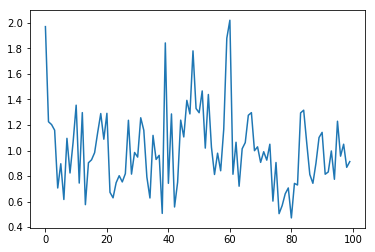

In [37]:
#Numero total de puntos
N = 1000
D = 5

X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)
y_obs = y + np.random.randn(N,1)

#alpha = learning rate
#epochs = epocas/ ciclos
#batch_size = cantidad del subconjunto de datos escogidos aleatoriamente
#decay= 
def gradient_descent(alpha=1e-3, n_epochs=100, batch_size=20, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # condiciones inicializadas
    # peso
    w = np.random.randn(D,1)
    params = []
    #perdidas solo se calculan con el batch escogido
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        #ciclo para recorrer todo el batch
        for j in range(epoch_run):
            #se escoge aleatoriamente la cantidad de batch
            idx = np.random.choice(len(X),batch_size,replace=False)
            #e = error, aqui se usan subsets de todo el set de datos, de esta manera se corta mucho tiempo
            e = y_obs[idx] - X[idx].dot(w) # Utilizar y_obs y no Y 
            #actualiza los parametros
            w = w - alpha*dL_dw(X[idx],e,w)
        #se intenta minizar el loss
        loss[i] = e.T.dot(e)/len(e)
        #el learning rate decrementa entre mas largo sea, para poder aproximar mas eficientemente y que pueda converjar
        alpha = alpha*decay 
        
    return params, loss
        
params, loss = gradient_descent()
plt.plot(loss)

In [23]:
import numpy as np
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

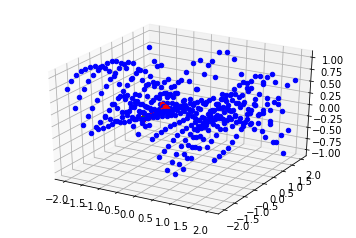

In [24]:
funcion = lambda f:np.sin(1/2 * f[0]**2 -1 / 4 * f[1]**2 +3) * np.cos(2*f[0]+1 - np.e **f[1])

fig = plt.figure()
ax= fig.add_subplot(111,projection="3d")

cantidad = 20
##genera vectores con valores de -2 a 2, una cantidad de veces (random)
random_x = np.linspace(-2,2,cantidad)
random_y = np.linspace(-2,2,cantidad)

random_fun = np.zeros((cantidad, cantidad))

for ix, x in enumerate(random_x):
    for iy, y in enumerate(random_y):
        random_fun[iy,ix] = funcion([x,y])
        ax.scatter(x,y, funcion([x,y]), c="blue", marker="o")
#onto aleatorio
Theta = np.random.rand(2)*4 -2

_T = np.copy(Theta)

h = 0.001
alpha = 0.1

gradiente=np.zeros(2)

for veces in range (1000):
    
    for iteracion, f in enumerate(Theta):
        _T = np.copy(Theta)
        _T[iteracion] = _T[iteracion] + h
        derivada = (funcion(_T) - funcion(Theta)) / h
        gradiente[iteracion] = derivada
    Theta = Theta - (alpha * gradiente)
    z= funcion([Theta[0],Theta[1]])
    ax.scatter(Theta[0], Theta[1], z, c="red", marker="o")
    
ax.scatter(Theta[0], Theta[1], z, c="green", marker="o")

    
plt.show()

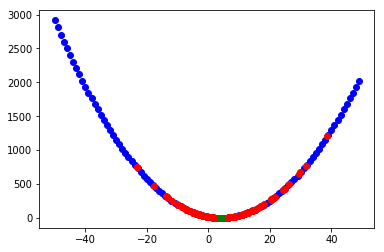

In [25]:
funcion = lambda f: f**2 -8*f +16

x = np.array(range(-50, 50))
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = funcion(x[i])
    plt.plot(x[i], y[i], "o", c="blue")
    
    
Theta = np.random.uniform(-50, 50, size=(20,))

_T = np.copy(Theta)

h = 0.001
alpha = 0.1

gradiente=np.zeros(1)
    
for veces in range (50):
    
    _T = np.copy(Theta)
    _T = _T + h
    derivada = (funcion(_T) - funcion(Theta)) / h
    gradiente = derivada
        
    Theta = Theta - (alpha * gradiente)
    plt.plot(Theta, funcion(Theta), "o", c="red")
    
plt.plot(Theta, funcion(Theta), "o", c="green")    
plt.show()


